1. DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\Priyal\\Downloads\\cumulative_2024.04.20_12.38.42.csv")

In [5]:
data

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [14]:
transit_columns = ['koi_period', 'koi_time0bk', 'koi_depth', 'koi_prad', 
                   'koi_steff', 'koi_slogg', 'koi_srad', 'koi_disposition']

In [15]:
transit_data = data[transit_columns]

In [16]:
transit_data.dropna(inplace=True)  # Remove rows with NaN values

C:\Users\Priyal\AppData\Local\Temp\ipykernel_3360\4004593383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transit_data.dropna(inplace=True)  # Remove rows with NaN values


In [17]:
print(transit_data.head())

   koi_period  koi_time0bk  koi_depth  koi_prad  koi_steff  koi_slogg  \
0    9.488036   170.538750      616.0      2.26     5455.0      4.467   
1   54.418383   162.513840      875.0      2.83     5455.0      4.467   
2   19.899140   175.850252    10800.0     14.60     5853.0      4.544   
3    1.736952   170.307565     8080.0     33.46     5805.0      4.564   
4    2.525592   171.595550      603.0      2.75     6031.0      4.438   

   koi_srad koi_disposition  
0     0.927       CONFIRMED  
1     0.927       CONFIRMED  
2     0.868       CANDIDATE  
3     0.791  FALSE POSITIVE  
4     1.046       CONFIRMED  


2. ANALYSIS - RANDOM FOREST

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
X = transit_data.drop(columns=['koi_disposition'])  # Assuming 'koi_disposition' is the target column
y = transit_data['koi_disposition']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf_classifier.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")

Random Forest Classifier Accuracy: 0.70


3. DESCRIPTIVE ANALYSIS - VISUALIZATION

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Descriptive Analysis
transit_desc = transit_data.describe()
print(transit_desc)

          koi_period  koi_time0bk     koi_depth       koi_prad     koi_steff  \
count    9201.000000  9201.000000  9.201000e+03    9201.000000   9201.000000   
mean       74.307951   165.461519  2.379245e+04     102.891778   5706.823280   
std      1360.538847    67.315287  8.224316e+04    3077.639126    796.857947   
min         0.241843   120.515914  0.000000e+00       0.080000   2661.000000   
25%         2.682768   132.745980  1.600000e+02       1.400000   5310.000000   
50%         9.296746   137.020590  4.210000e+02       2.390000   5767.000000   
75%        36.856776   170.369150  1.470000e+03      14.930000   6112.000000   
max    129995.778400  1472.522306  1.540000e+06  200346.000000  15896.000000   

         koi_slogg     koi_srad  
count  9201.000000  9201.000000  
mean      4.310157     1.728712  
std       0.432606     6.127185  
min       0.047000     0.109000  
25%       4.218000     0.829000  
50%       4.438000     1.000000  
75%       4.543000     1.345000  
max    

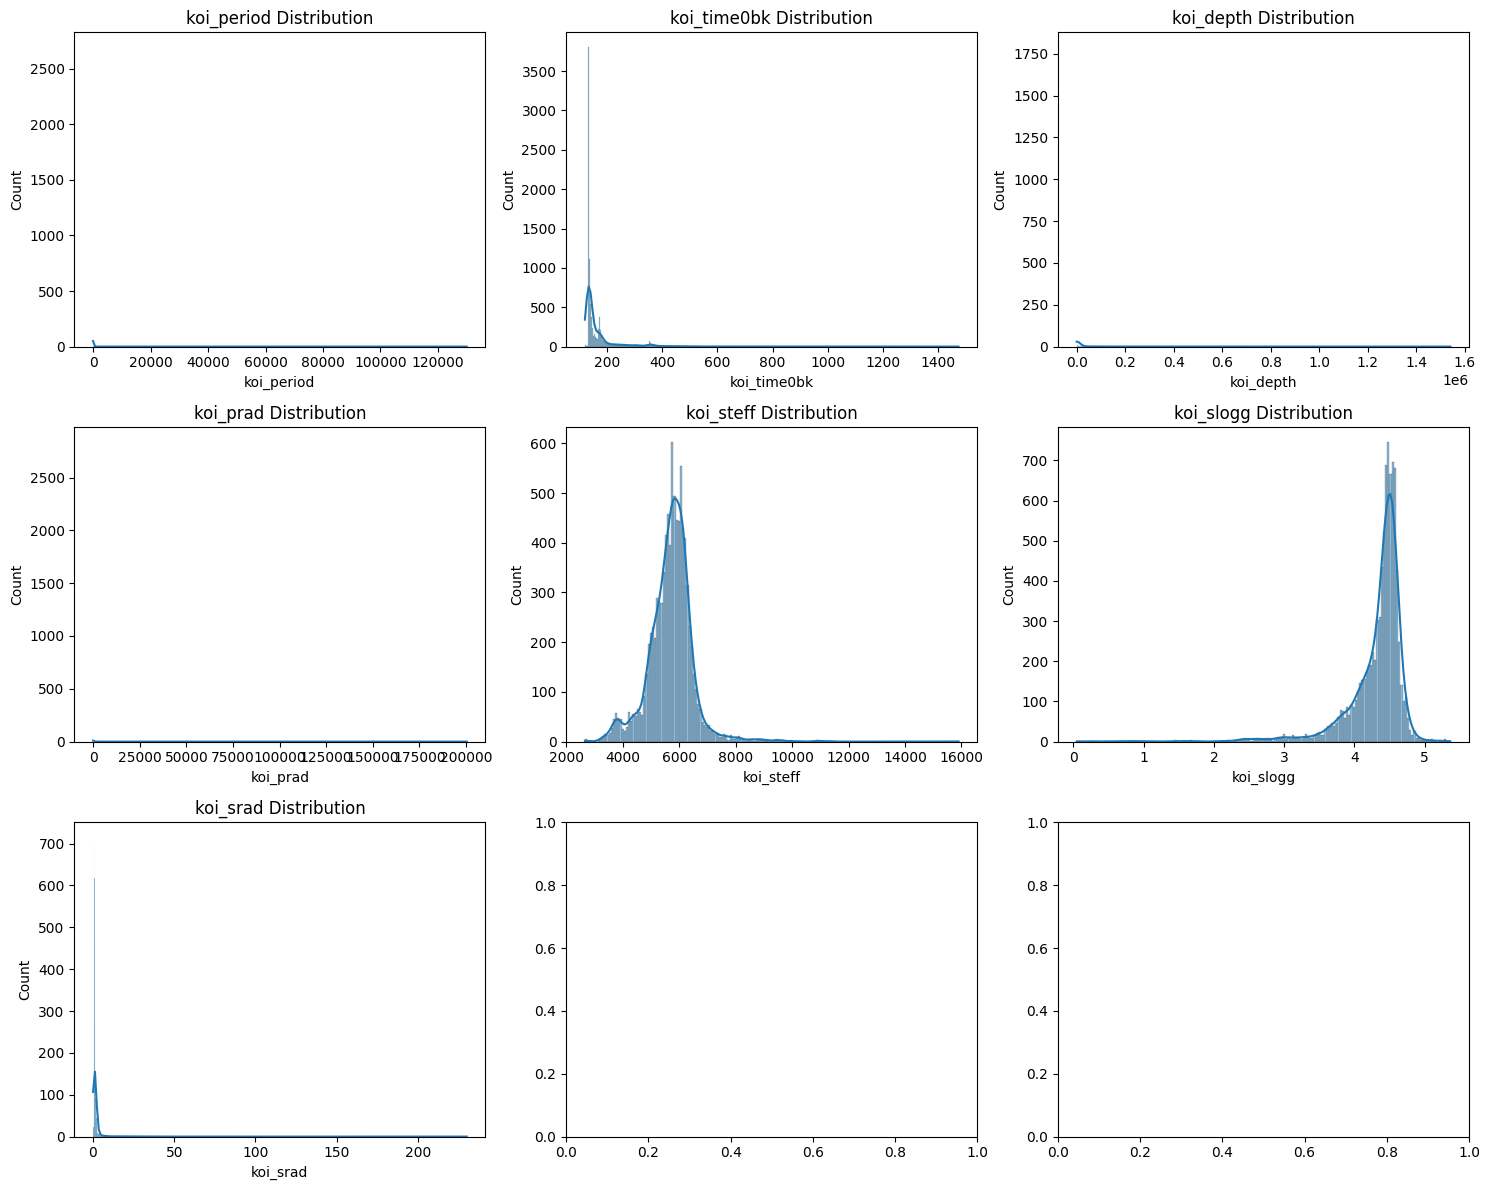

In [28]:
# Visualize distribution using histograms
num_plots = len(transit_data.columns) - 1  # Exclude 'koi_disposition' column
num_cols = 3  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to get the number of rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

for i, col in enumerate(transit_data.columns):
    if col != 'koi_disposition':
        sns.histplot(data=transit_data, x=col, kde=True, ax=axes[i//num_cols, i%num_cols])
        axes[i//num_cols, i%num_cols].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

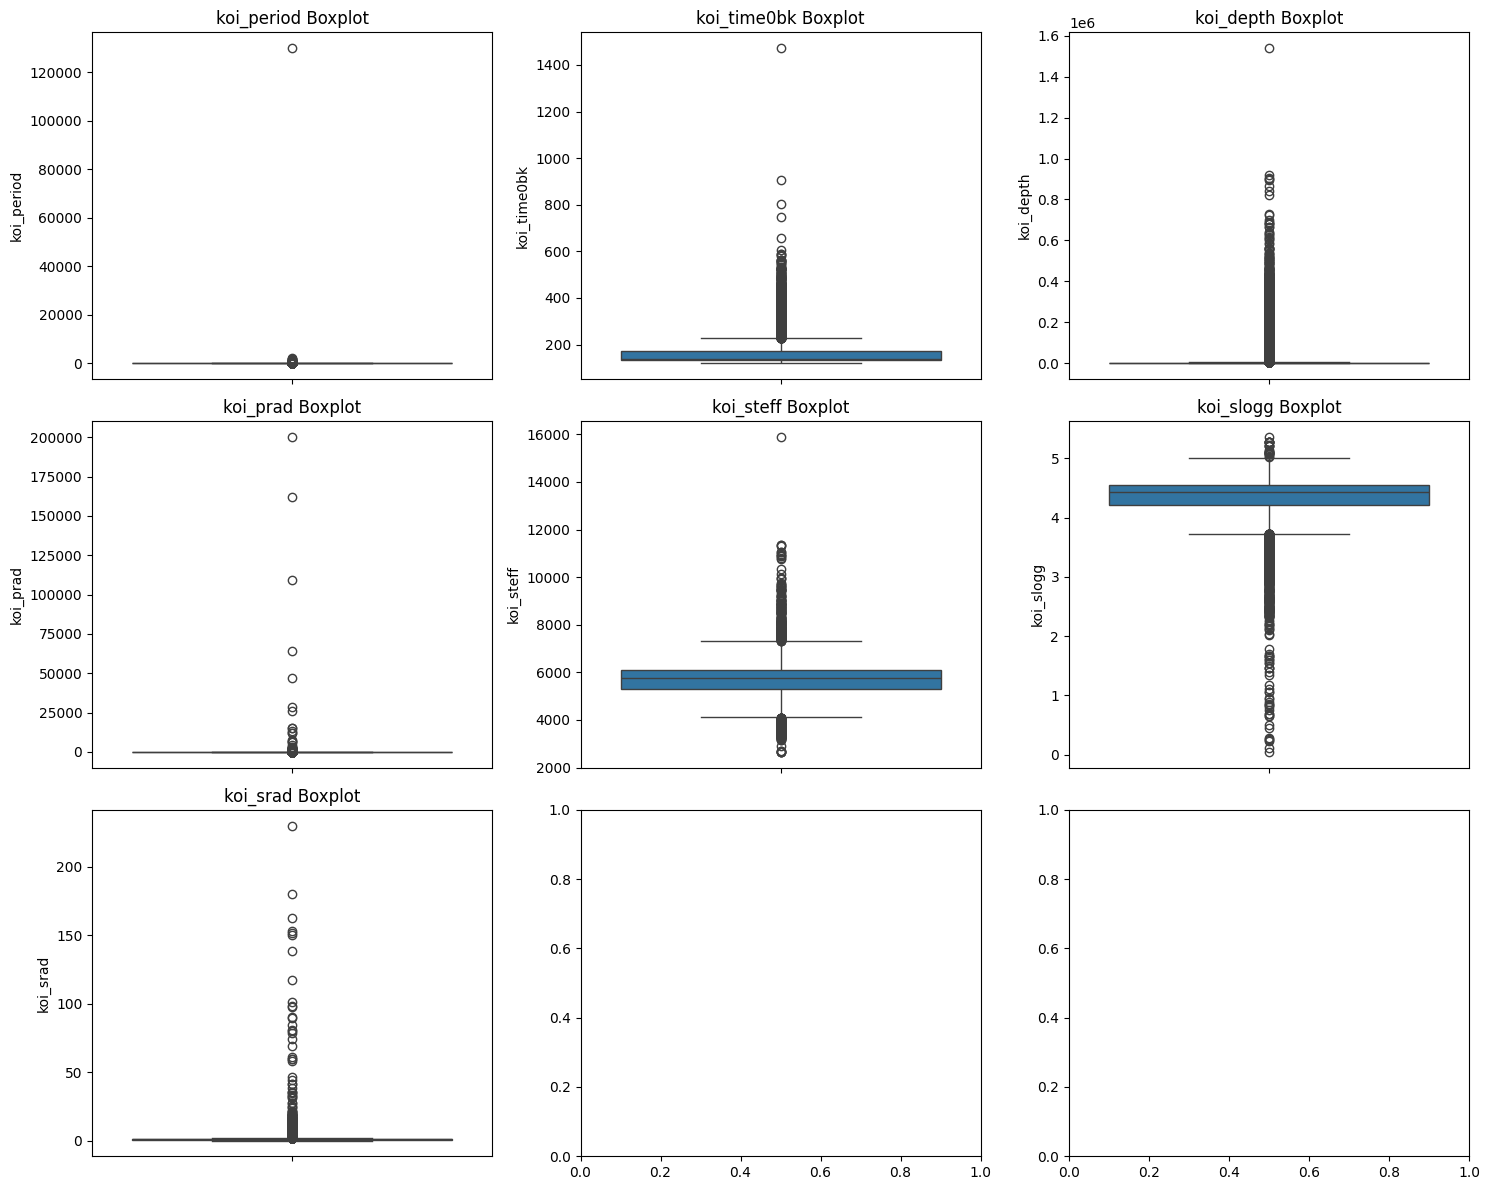

In [29]:
# Visualize distribution using box plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

for i, col in enumerate(transit_data.columns):
    if col != 'koi_disposition':
        sns.boxplot(data=transit_data, y=col, ax=axes[i//num_cols, i%num_cols])
        axes[i//num_cols, i%num_cols].set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

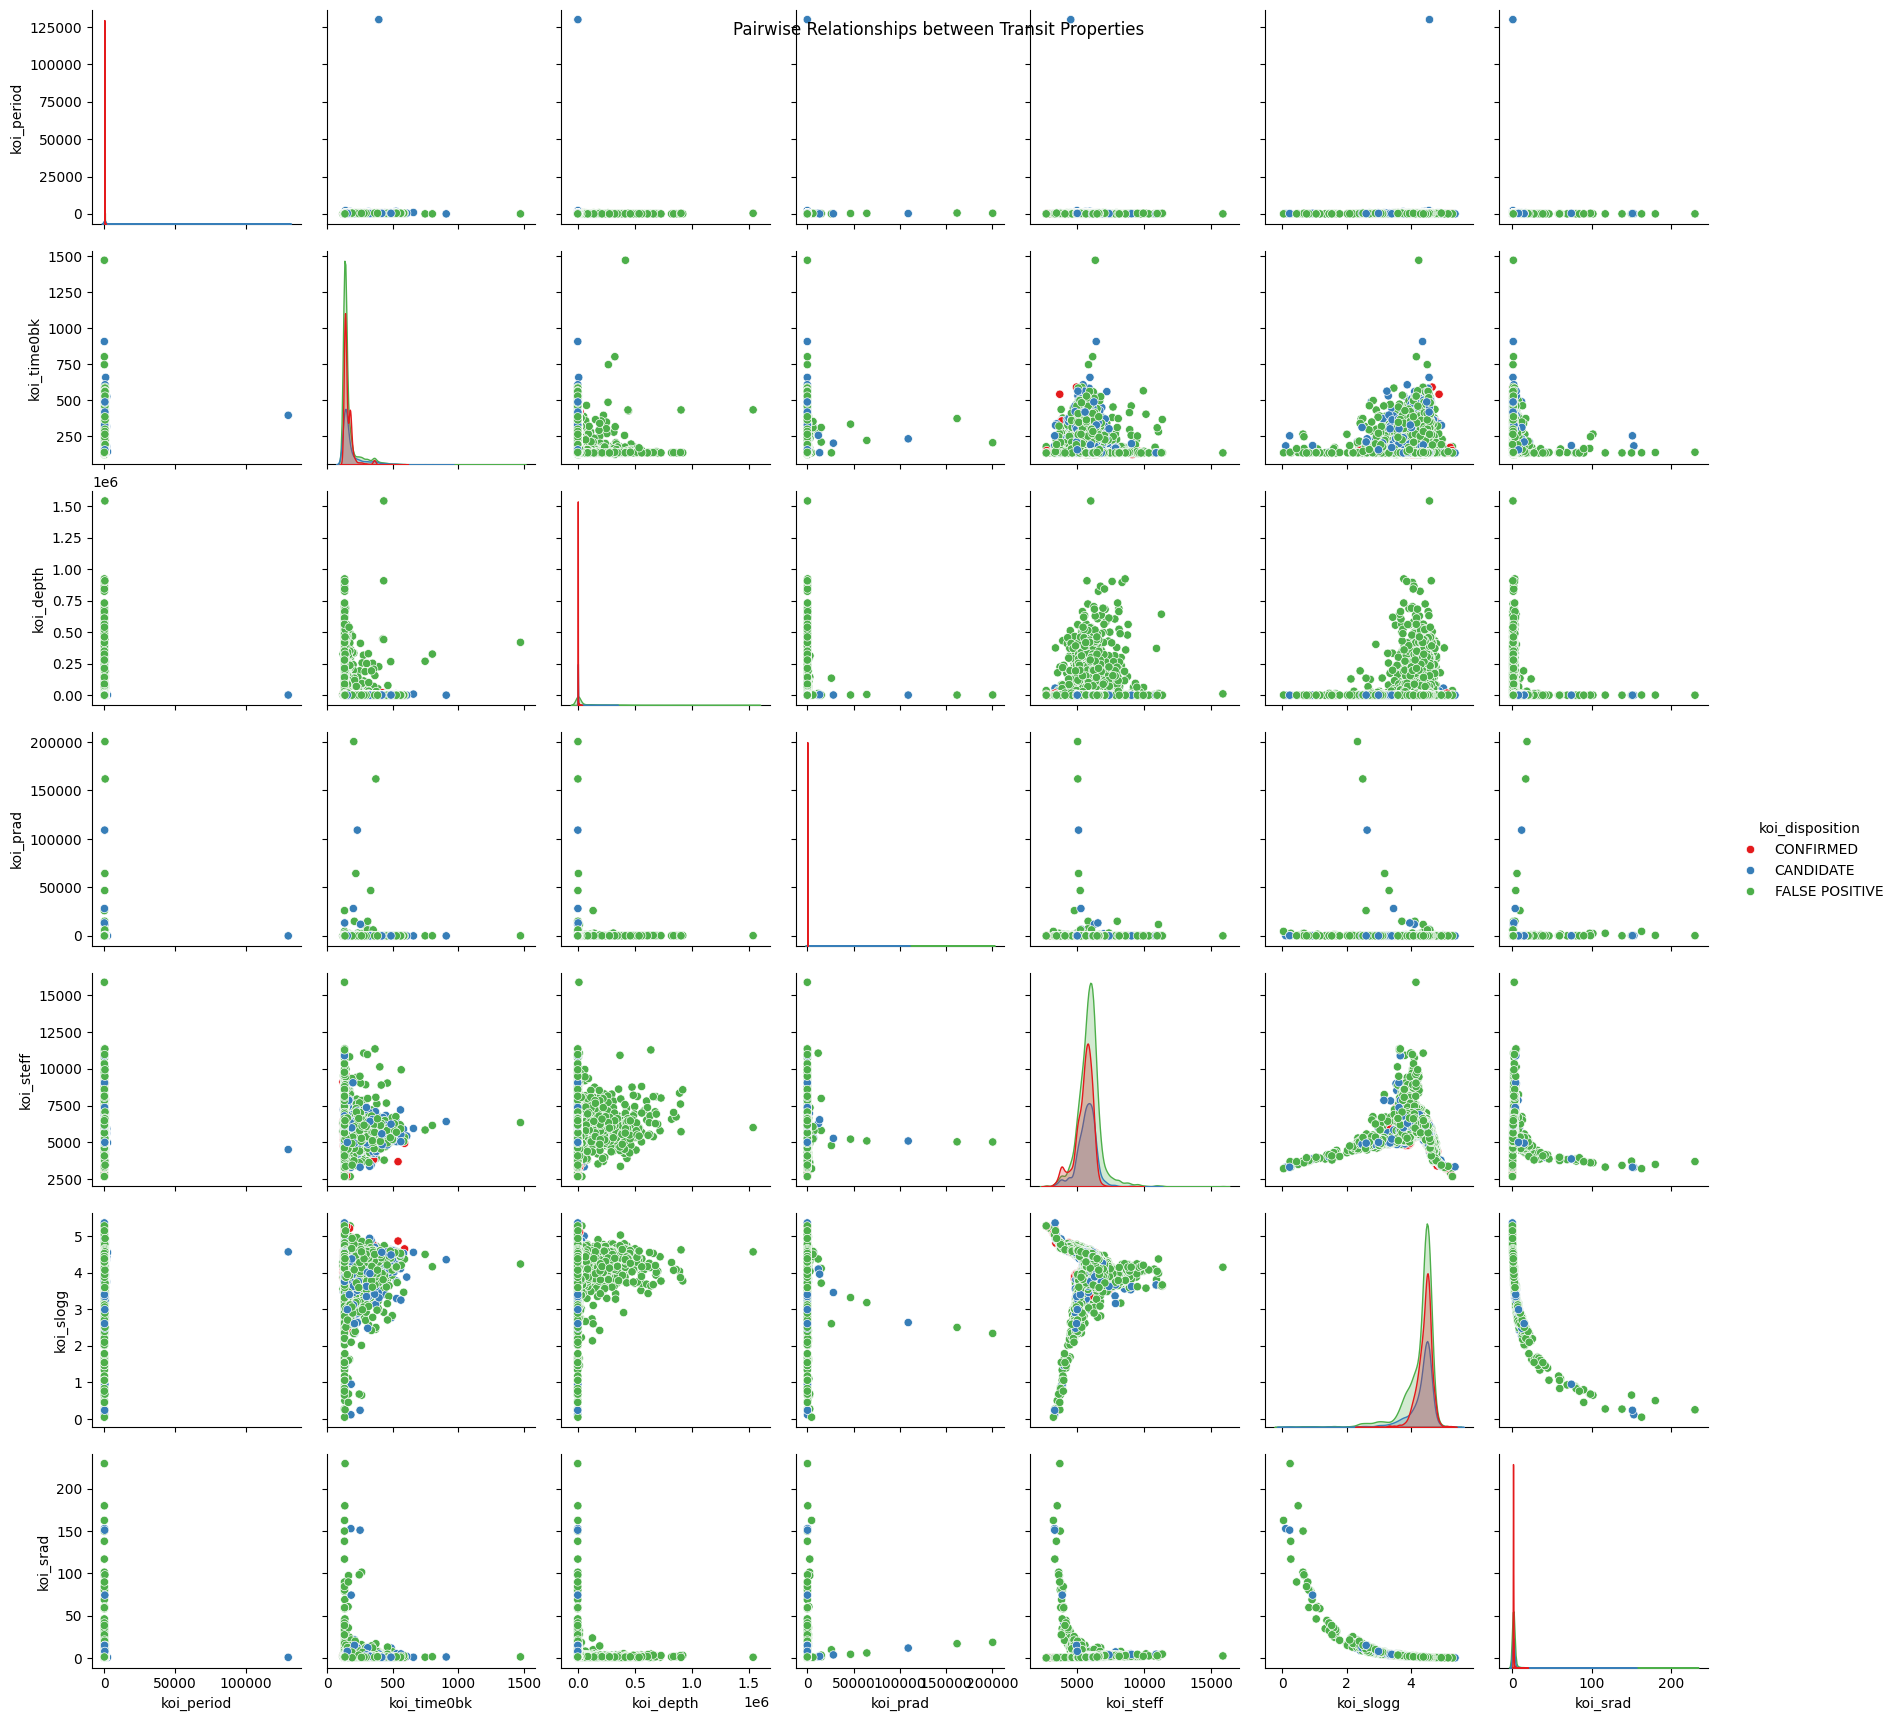

In [30]:
# Explore relationships using scatter plots
sns.pairplot(data=transit_data, hue='koi_disposition', palette='Set1')
plt.suptitle('Pairwise Relationships between Transit Properties')
plt.show()

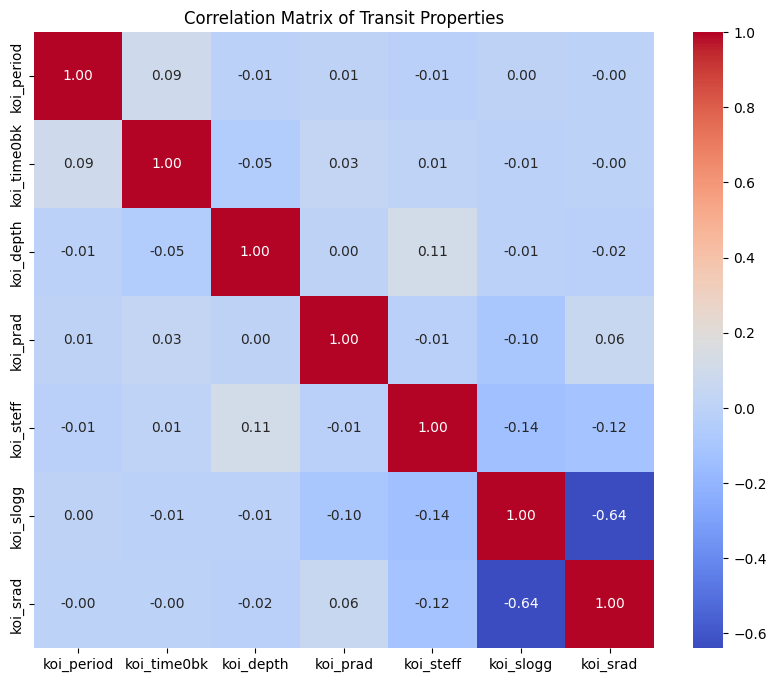

In [32]:
numerical_cols = [col for col in transit_data.columns if transit_data[col].dtype in ['float64', 'int64']]
correlation_matrix = transit_data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Transit Properties')
plt.show()

3. FEATURE IMPORTANCE ANALYSIS

In [33]:
features = ['koi_period', 'koi_time0bk', 'koi_depth', 'koi_prad', 'koi_steff', 'koi_slogg', 'koi_srad']
target = 'koi_disposition'

In [38]:
data_clean = data.dropna(subset=features+[target])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data_clean[features], data_clean[target], test_size=0.2, random_state=42)

In [40]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
feature_importances = rf_classifier.feature_importances_


In [43]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

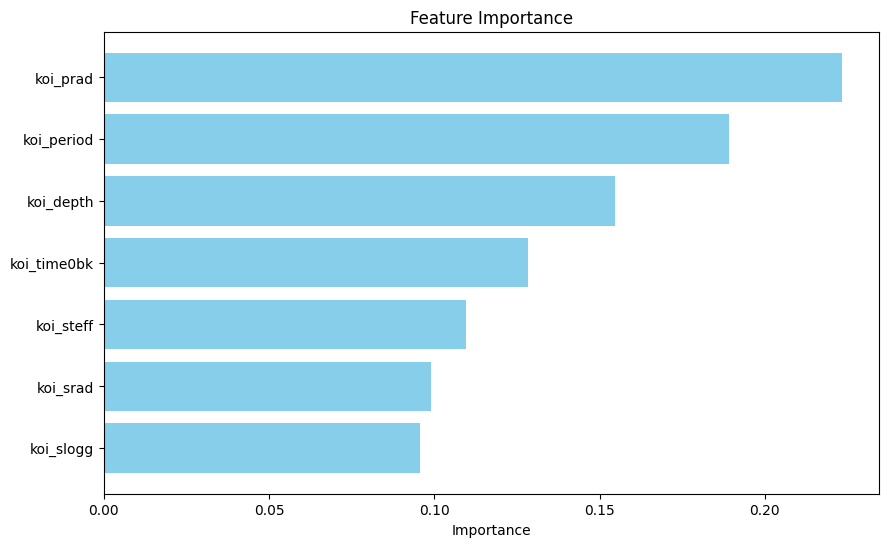

In [44]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features on top
plt.show()